<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/Wagner_LopesCardozo_Semin%C3%A1rio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

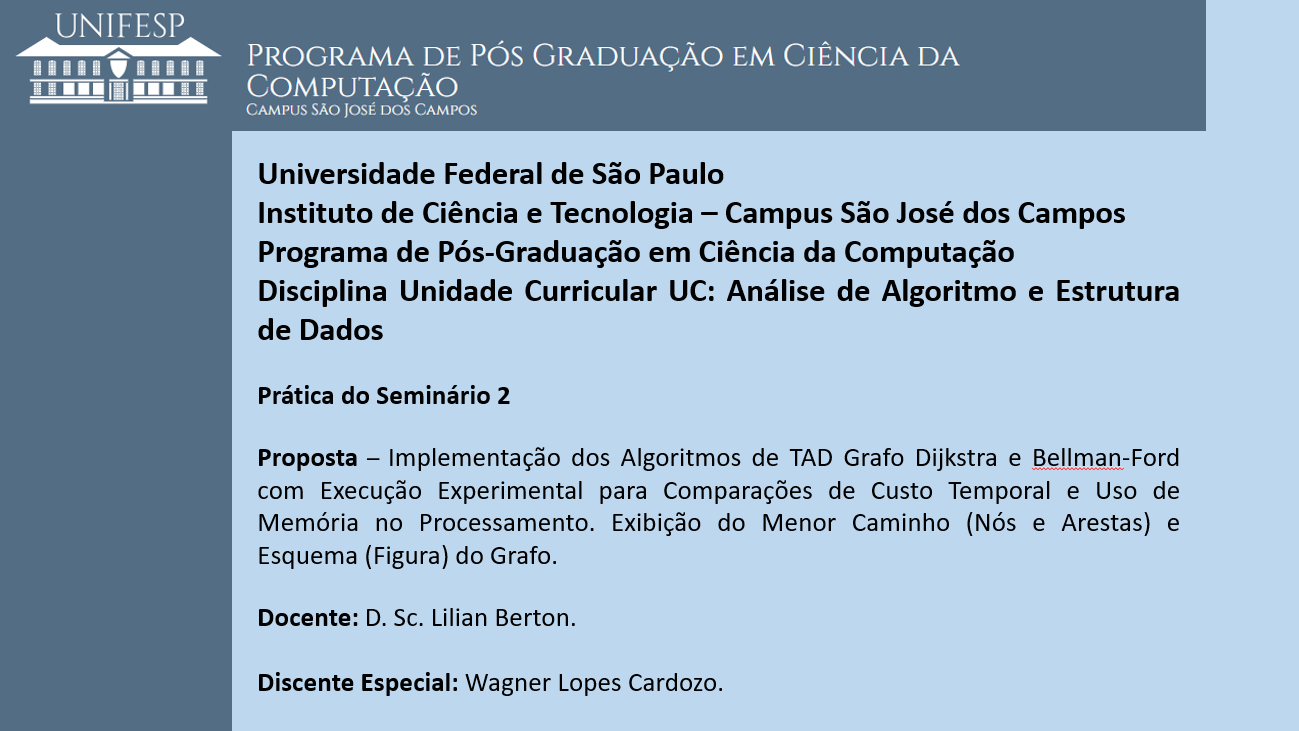

#<font color=lightblue>Implementando o algoritmo Dijkstra e Bellmon-Ford com a tomada de tempo em (s) e memória usada no processamento em (bytes)

In [ ]:
import time
import tracemalloc
import random
from collections import defaultdict
from tabulate import tabulate
import heapq

# Classe para o algoritmo de Dijkstra
class GrafoDijkstra:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = defaultdict(list)

    def adicionar_aresta(self, u, v, peso):
        self.grafo[u].append((v, peso))

    def dijkstra(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0
        pq = [(0, start)]

        while pq:
            d, u = heapq.heappop(pq)
            if d > dist[u]:
                continue
            for v, peso in self.grafo[u]:
                if dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso
                    heapq.heappush(pq, (dist[v], v))

        return dist[-1]  # Retorna a distância até o último nó

# Classe para o algoritmo de Bellman-Ford
class GrafoBellmanFord:
    def __init__(self, vertices):
        self.V = vertices
        self.arestas = []

    def adicionar_aresta(self, u, v, peso):
        self.arestas.append((u, v, peso))

    def bellman_ford(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0

        for _ in range(self.V - 1):
            for u, v, peso in self.arestas:
                if dist[u] != float('inf') and dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso

        return dist[-1]  # Retorna a distância até o último nó

# Função para medir o tempo e a memória
def medir_algoritmo(funcao, *args):
    tracemalloc.start()
    start_time = time.time()
    resultado = funcao(*args)
    end_time = time.time()
    memory_used, _ = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return end_time - start_time, memory_used

# Configuração do grafo com 1000 nós totalmente conectados
num_vertices = 200
grafo_dijkstra = GrafoDijkstra(num_vertices)
grafo_bellman = GrafoBellmanFord(num_vertices)

# Adiciona arestas com peso aleatório entre cada par de nós
for u in range(num_vertices):
    for v in range(u + 1, num_vertices):
        peso = random.randint(1, 10)
        grafo_dijkstra.adicionar_aresta(u, v, peso)
        grafo_dijkstra.adicionar_aresta(v, u, peso)
        grafo_bellman.adicionar_aresta(u, v, peso)
        grafo_bellman.adicionar_aresta(v, u, peso)

# Tabela de resultados com tempo e memória para Dijkstra e Bellman-Ford
resultados = [
    ["Dijkstra", *medir_algoritmo(grafo_dijkstra.dijkstra, 0)],
    ["Bellman-Ford", *medir_algoritmo(grafo_bellman.bellman_ford, 0)]
]

# Exibir resultados em tabela
print(tabulate(resultados, headers=["Algoritmo", "Tempo (s)", "Memória (bytes)"], tablefmt="grid"))

+--------------+-------------+-------------------+
| Algoritmo    |   Tempo (s) |   Memória (bytes) |
+==============+=============+===================+
| Dijkstra     |  0.00711131 |             28320 |
+--------------+-------------+-------------------+
| Bellman-Ford |  2.57838    |             14779 |
+--------------+-------------+-------------------+


#<font color=lightblue>Implementando os algoritmos Dijkstra e Bellman-Ford e comparando o tempo em (s) e memória em (bytes) com os algoritmos Prim,  Kruskal, Ford-Fulkerson e Kosaraju      

In [ ]:
import time
import tracemalloc
from collections import defaultdict
from tabulate import tabulate
import heapq

# Classe para o algoritmo de Prim
class GrafoPrim:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = [[0] * vertices for _ in range(vertices)]

    def adicionar_aresta(self, u, v, peso):
        self.grafo[u][v] = peso
        self.grafo[v][u] = peso

    def prim(self):
        selecionados = [False] * self.V
        edges = [(0, 0)]
        resultado = []

        while len(resultado) < self.V - 1 and edges:
            peso, u = heapq.heappop(edges)
            if selecionados[u]:
                continue
            selecionados[u] = True
            resultado.append((peso, u))
            for v, peso in enumerate(self.grafo[u]):
                if not selecionados[v] and peso:
                    heapq.heappush(edges, (peso, v))

        return resultado

# Classe para o algoritmo de Kruskal
class GrafoKruskal:
    def __init__(self, vertices):
        self.V = vertices
        self.arestas = []

    def adicionar_aresta(self, u, v, peso):
        self.arestas.append((peso, u, v))

    def kruskal(self):
        self.arestas.sort()
        pai = list(range(self.V))
        resultado = []

        def find(v):
            if pai[v] != v:
                pai[v] = find(pai[v])
            return pai[v]

        def union(u, v):
            pai[find(u)] = find(v)

        for peso, u, v in self.arestas:
            if find(u) != find(v):
                resultado.append((u, v, peso))
                union(u, v)

        return resultado

# Classe para o algoritmo de Dijkstra
class GrafoDijkstra:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = defaultdict(list)

    def adicionar_aresta(self, u, v, peso):
        self.grafo[u].append((v, peso))

    def dijkstra(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0
        pq = [(0, start)]

        while pq:
            d, u = heapq.heappop(pq)
            if d > dist[u]:
                continue
            for v, peso in self.grafo[u]:
                if dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso
                    heapq.heappush(pq, (dist[v], v))

        return dist

# Classe para o algoritmo de Bellman-Ford
class GrafoBellmanFord:
    def __init__(self, vertices):
        self.V = vertices
        self.arestas = []

    def adicionar_aresta(self, u, v, peso):
        self.arestas.append((u, v, peso))

    def bellman_ford(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0

        for _ in range(self.V - 1):
            for u, v, peso in self.arestas:
                if dist[u] != float('inf') and dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso

        return dist

# Classe para o algoritmo de Ford-Fulkerson
class GrafoFordFulkerson:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = [[0] * vertices for _ in range(vertices)]

    def adicionar_aresta(self, u, v, capacidade):
        self.grafo[u][v] = capacidade

    def ford_fulkerson(self, source, sink):
        max_flow = 0
        parent = [-1] * self.V

        def bfs(s, t):
            visited = [False] * self.V
            queue = [s]
            visited[s] = True

            while queue:
                u = queue.pop(0)
                for v, cap in enumerate(self.grafo[u]):
                    if not visited[v] and cap > 0:
                        parent[v] = u
                        visited[v] = True
                        queue.append(v)
                        if v == t:
                            return True
            return False

        while bfs(source, sink):
            path_flow = float('Inf')
            s = sink
            while s != source:
                path_flow = min(path_flow, self.grafo[parent[s]][s])
                s = parent[s]
            max_flow += path_flow
            v = sink
            while v != source:
                u = parent[v]
                self.grafo[u][v] -= path_flow
                self.grafo[v][u] += path_flow
                v = parent[v]

        return max_flow

# Classe para o algoritmo de Kosaraju
class GrafoKosaraju:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = defaultdict(list)

    def adicionar_aresta(self, u, v):
        self.grafo[u].append(v)

    def kosaraju(self):
        visited = [False] * self.V
        stack = []
        for i in range(self.V):
            if not visited[i]:
                self.dfs(i, visited, stack)
        gt = self.transpor()
        visited = [False] * self.V
        scc = []
        while stack:
            i = stack.pop()
            if not visited[i]:
                componente = []
                gt.dfs(i, visited, componente)
                scc.append(componente)
        return scc

    def dfs(self, v, visited, stack=None):
        visited[v] = True
        for i in self.grafo[v]:
            if not visited[i]:
                self.dfs(i, visited, stack)
        if stack is not None:
            stack.append(v)

    def transpor(self):
        g_transposto = GrafoKosaraju(self.V)
        for i in self.grafo:
            for j in self.grafo[i]:
                g_transposto.adicionar_aresta(j, i)
        return g_transposto

# Função para medir o tempo e memória
def medir_algoritmo(funcao, *args):
    tracemalloc.start()
    start_time = time.time()
    resultado = funcao(*args)
    end_time = time.time()
    memory_used, _ = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return end_time - start_time, memory_used

# Configurações e execução dos algoritmos
g_prim = GrafoPrim(5)
g_kruskal = GrafoKruskal(5)
g_dijkstra = GrafoDijkstra(5)
g_bellman = GrafoBellmanFord(5)
g_ford = GrafoFordFulkerson(5)
g_kosaraju = GrafoKosaraju(5)

# Adiciona arestas nos grafos (exemplo para testes)
g_prim.adicionar_aresta(0, 1, 2)
g_prim.adicionar_aresta(0, 3, 6)
g_prim.adicionar_aresta(1, 3, 8)
g_prim.adicionar_aresta(1, 4, 5)
g_prim.adicionar_aresta(1, 2, 3)
g_prim.adicionar_aresta(2, 4, 7)
g_kruskal.adicionar_aresta(0, 1, 2)
g_kruskal.adicionar_aresta(0, 3, 6)
g_kruskal.adicionar_aresta(1, 3, 8)
g_kruskal.adicionar_aresta(1, 4, 5)
g_kruskal.adicionar_aresta(1, 2, 3)
g_kruskal.adicionar_aresta(2, 4, 7)
g_dijkstra.adicionar_aresta(0, 1, 2)
g_dijkstra.adicionar_aresta(0, 3, 6)
g_dijkstra.adicionar_aresta(1, 2, 3)
g_bellman.adicionar_aresta(0, 1, 2)
g_bellman.adicionar_aresta(0, 3, 6)
g_bellman.adicionar_aresta(1, 2, 3)
g_ford.adicionar_aresta(0, 1, 16)
g_ford.adicionar_aresta(1, 3, 12)
g_kosaraju.adicionar_aresta(0, 1)
g_kosaraju.adicionar_aresta(1, 2)
g_kosaraju.adicionar_aresta(2, 0)
g_kosaraju.adicionar_aresta(3, 4)

# Tabela de resultados
resultados = [
    ["Prim", *medir_algoritmo(g_prim.prim)],
    ["Kruskal", *medir_algoritmo(g_kruskal.kruskal)],
    ["Dijkstra", *medir_algoritmo(g_dijkstra.dijkstra, 0)],
    ["Bellman-Ford", *medir_algoritmo(g_bellman.bellman_ford, 0)],
    ["Ford-Fulkerson", *medir_algoritmo(g_ford.ford_fulkerson, 0, 4)],
    ["Kosaraju", *medir_algoritmo(g_kosaraju.kosaraju)]
]

# Exibir resultados em tabela
print(tabulate(resultados, headers=["Algoritmo", "Tempo (s)", "Memória (bytes)"], tablefmt="grid"))

+----------------+-------------+-------------------+
| Algoritmo      |   Tempo (s) |   Memória (bytes) |
+================+=============+===================+
| Prim           | 5.67436e-05 |               512 |
+----------------+-------------+-------------------+
| Kruskal        | 4.88758e-05 |              2984 |
+----------------+-------------+-------------------+
| Dijkstra       | 1.66893e-05 |               640 |
+----------------+-------------+-------------------+
| Bellman-Ford   | 1.50204e-05 |               512 |
+----------------+-------------+-------------------+
| Ford-Fulkerson | 2.36034e-05 |              1096 |
+----------------+-------------+-------------------+
| Kosaraju       | 7.84397e-05 |              3024 |
+----------------+-------------+-------------------+


#<font color=lightblue>Comparando Tempo e Memória de Processamento na Implementação dos algoritmos Dijkstra e Bellman-Ford Usando as Bibliotecas do Python NetWorkX e SciPy

In [ ]:
import networkx as nx
import numpy as np
from scipy.sparse.csgraph import dijkstra
from tabulate import tabulate
import time
import tracemalloc

# Função para medir tempo e memória de execução
def measure_performance(func, *args):
    tracemalloc.start()
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return result, end_time - start_time, peak

# Criação do grafo para testes
G = nx.DiGraph()
edges = [
    (0, 1, 4), (0, 2, 1), (2, 1, 2), (1, 3, 1), (2, 3, 5), (3, 4, 3), (4, 5, 1), (5, 3, -1)
]
G.add_weighted_edges_from(edges)

# Matriz de adjacência para Scipy
graph_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()), weight='weight')
graph_matrix[graph_matrix == 0] = np.inf
np.fill_diagonal(graph_matrix, 0)

# Executando e medindo o desempenho para NetworkX - Dijkstra
_, dijkstra_time_1, dijkstra_memory_1 = measure_performance(nx.shortest_path, G, 0, 4, 'weight')
_, dijkstra_time_2, dijkstra_memory_2 = measure_performance(nx.single_source_dijkstra, G, 0, 4)

# Executando e medindo o desempenho para NetworkX - Bellman-Ford
_, bellman_time_1, bellman_memory_1 = measure_performance(nx.bellman_ford_path, G, 0, 4)
_, bellman_time_2, bellman_memory_2 = measure_performance(nx.single_source_bellman_ford_path, G, 0, 4)

# Executando e medindo o desempenho para Scipy - Dijkstra
_, scipy_time, scipy_memory = measure_performance(dijkstra, graph_matrix, True, True)

# Convertendo a memória de bytes para megabytes para facilitar a leitura
dijkstra_memory_1_mb = dijkstra_memory_1 / (1024 * 1024)
dijkstra_memory_2_mb = dijkstra_memory_2 / (1024 * 1024)
bellman_memory_1_mb = bellman_memory_1 / (1024 * 1024)
bellman_memory_2_mb = bellman_memory_2 / (1024 * 1024)
scipy_memory_mb = scipy_memory / (1024 * 1024)

# Formatando os dados para a tabela
results = [
    ["NetworkX Dijkstra - shortest_path", f"{dijkstra_time_1:.6f}", f"{dijkstra_memory_1_mb:.6f} MB"],
    ["NetworkX Dijkstra - single_source_dijkstra", f"{dijkstra_time_2:.6f}", f"{dijkstra_memory_2_mb:.6f} MB"],
    ["NetworkX Bellman-Ford - bellman_ford_path", f"{bellman_time_1:.6f}", f"{bellman_memory_1_mb:.6f} MB"],
    ["NetworkX Bellman-Ford - single_source_bellman_ford_path", f"{bellman_time_2:.6f}", f"{bellman_memory_2_mb:.6f} MB"],
    ["Scipy Dijkstra", f"{scipy_time:.6f}", f"{scipy_memory_mb:.6f} MB"]
]

# Exibindo os resultados em formato de tabela fechada
headers = ["Algoritmo", "Tempo de Execução (s)", "Memória Usada (MB)"]
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))


╒═════════════════════════════════════════════════════════╤═════════════════════════╤══════════════════════╕
│ Algoritmo                                               │   Tempo de Execução (s) │ Memória Usada (MB)   │
╞═════════════════════════════════════════════════════════╪═════════════════════════╪══════════════════════╡
│ NetworkX Dijkstra - shortest_path                       │                0.000336 │ 0.005150 MB          │
├─────────────────────────────────────────────────────────┼─────────────────────────┼──────────────────────┤
│ NetworkX Dijkstra - single_source_dijkstra              │                0.000158 │ 0.003784 MB          │
├─────────────────────────────────────────────────────────┼─────────────────────────┼──────────────────────┤
│ NetworkX Bellman-Ford - bellman_ford_path               │                0.000242 │ 0.005295 MB          │
├─────────────────────────────────────────────────────────┼─────────────────────────┼──────────────────────┤
│ NetworkX Bellman-

<ipython-input-11-8b62701032ab>:12: UserWarning: Graph has negative weights: dijkstra will give inaccurate results if the graph contains negative cycles. Consider johnson or bellman_ford.
  result = func(*args)


In [ ]:
!pip install memory-profiler

#<font color=lightblue>Implementando o algoritmo Dijkstra com uma Quantidade Menor de Nós (20 nós) e Arestas (com os Respectivos Pesos) com Tomada de Tempo de Execução e Exibição dos Nós (com seus Respectivos Valores) e Caminho de Menor Custo Pecorrido. Este Algoritmo Exibe Também a Figura do Grafo

Algoritmo de Dijkstra:
Tempo de execução: 0.104831 segundos
Memória usada: 0.00 MB

Distâncias mínimas de cada nó a partir do nó inicial:
Nó 0: 0
Nó 1: 2
Nó 2: 5
Nó 3: 9
Nó 5: 6
Nó 6: 12
Nó 7: 17
Nó 4: inf
Nó 8: inf
Nó 9: 7
Nó 10: 14
Nó 11: 23
Nó 12: inf
Nó 13: 10
Nó 14: 15
Nó 15: 28
Nó 16: inf
Nó 17: 17
Nó 18: 21
Nó 19: 22

Caminho de menor custo:
0 -> 2 -> 5 -> 9 -> 13 -> 17 -> 19


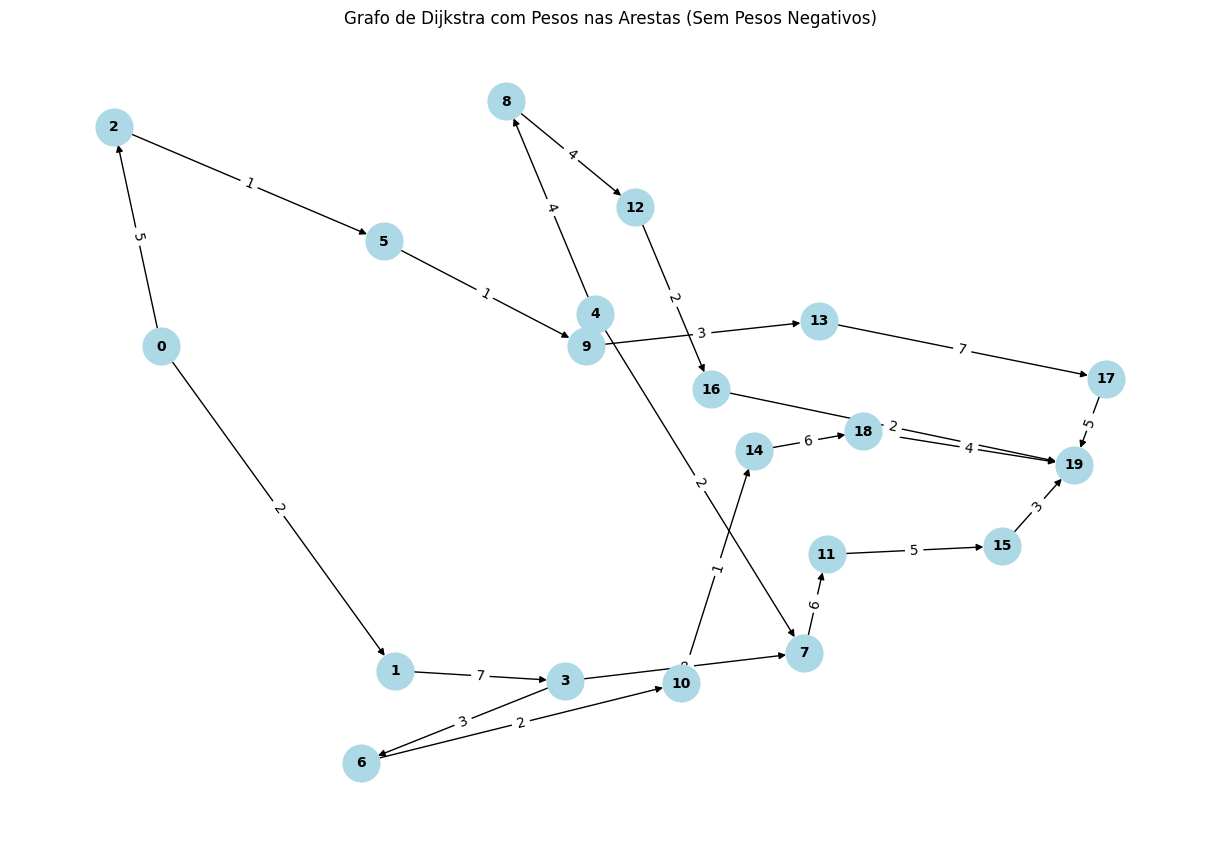

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

# Função para calcular o caminho mínimo usando Dijkstra
def dijkstra_algorithm(graph, start_node):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

# Função para reconstruir o caminho de menor custo
def get_shortest_path(predecessors, start_node, target_node):
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Função para medir o uso de memória
def memory_usage_func():
    mem_usage = memory_usage()
    return mem_usage[0]  # Retorna o primeiro valor da lista de memória usada

# Criar o grafo de exemplo com arestas
G = nx.DiGraph()                                       # Outra forma de criar o grafo
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, 2), (4, 8, 4), (5, 9, 1),
    (6, 10, 2), (7, 11, 6), (8, 12, 4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, 2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, 5), (18, 19, 4)
]
G.add_weighted_edges_from(edges)

# Definir o nó inicial e final
start_node = 0
target_node = 19

# Medindo o tempo e memória para o algoritmo de Dijkstra
start_time = time.time()
start_memory = memory_usage_func()

# Executando o algoritmo de Dijkstra
distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
dijkstra_time = time.time() - start_time
dijkstra_memory = memory_usage_func() - start_memory

# Obter o caminho de menor custo
dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)

# Exibir os resultados
print(f"Algoritmo de Dijkstra:")
print(f"Tempo de execução: {dijkstra_time:.6f} segundos")
print(f"Memória usada: {dijkstra_memory:.2f} MB")
print("\nDistâncias mínimas de cada nó a partir do nó inicial:")
for node, distance in distances_dijkstra.items():
    print(f"Nó {node}: {distance}")

print("\nCaminho de menor custo:")
if dijkstra_path:
    print(" -> ".join(map(str, dijkstra_path)))
else:
    print("Não existe um caminho válido.")

# Exibir o grafo com as distâncias e os valores das arestas
pos = nx.spring_layout(G, seed=42)  # Layout para o grafo
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Exibir o título e o gráfico
plt.title("Grafo de Dijkstra com Pesos nas Arestas (Sem Pesos Negativos)")
plt.show()

#<font color=lightblue>Implementando o algoritmo Bellman-Ford com uma Quantidade Menor de Nós (20 nós) e Arestas com pesos Positivos e Negativos com Tomada de Tempo de Execução e Exibição dos Nós e seus Valores e Caminho de Menor Custo Pecorrido. Este Algoritmo Exibe Também a Figura do Grafo

Algoritmo de Bellman-Ford:
Tempo de execução: 0.000892 segundos
Memória usada: 0.00 MB

Distâncias mínimas de cada nó a partir do nó inicial:
Nó 0: 0
Nó 1: 2
Nó 2: 5
Nó 3: 9
Nó 4: -1
Nó 5: 6
Nó 6: 12
Nó 7: -3
Nó 8: 3
Nó 9: 5
Nó 10: 14
Nó 11: 3
Nó 12: -1
Nó 13: 8
Nó 14: 6
Nó 15: 8
Nó 16: -3
Nó 17: 15
Nó 18: 12
Nó 19: -1

Caminho de menor custo:
0 -> 1 -> 4 -> 8 -> 12 -> 16 -> 19


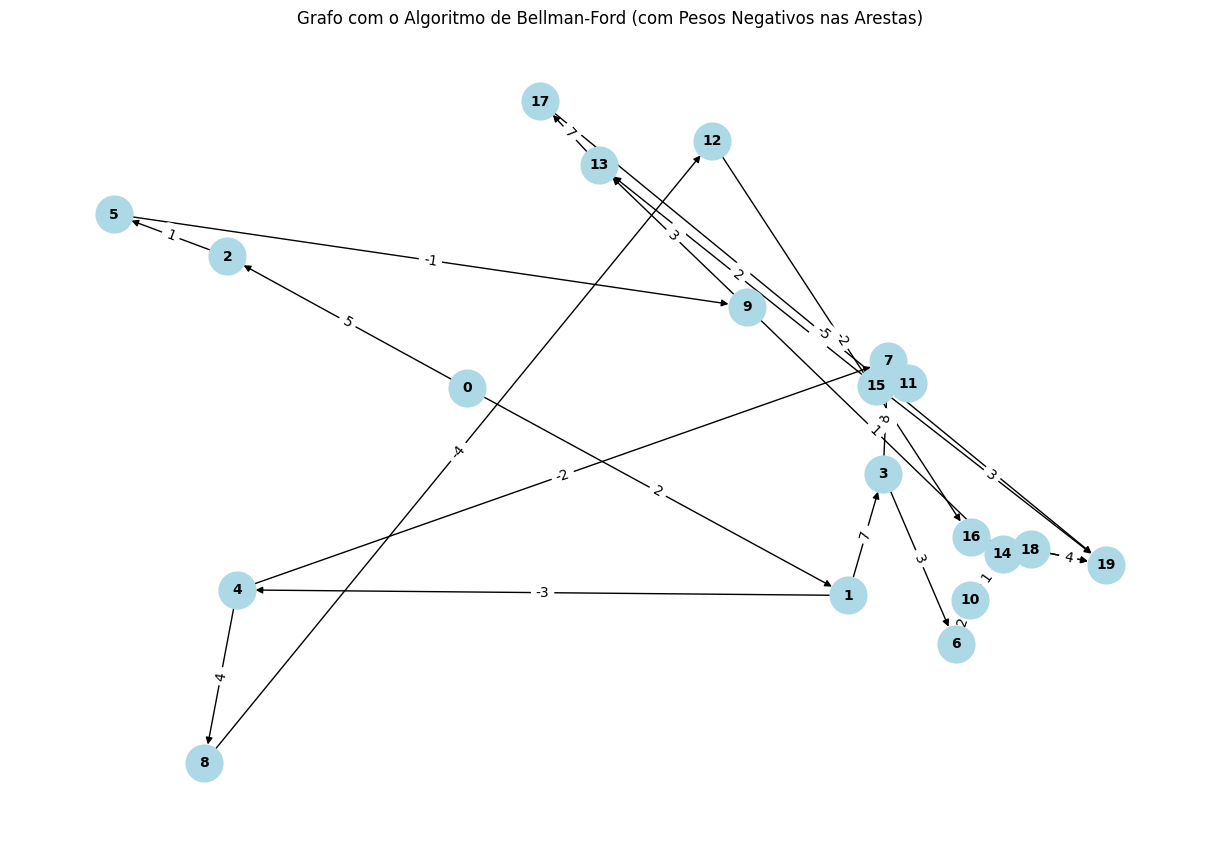

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil
import os

# Função para calcular o caminho mínimo usando o algoritmo de Bellman-Ford
def bellman_ford_algorithm(graph, start_node):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}

    # Relaxar as arestas |V| - 1 vezes
    for _ in range(len(graph.nodes()) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data.get("weight", 1)
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # Verificação de ciclos negativos
    for u, v, data in graph.edges(data=True):
        weight = data.get("weight", 1)
        if distances[u] + weight < distances[v]:
            raise ValueError("O grafo contém um ciclo negativo.")

    return distances, predecessors

# Função para reconstruir o caminho de menor custo
def get_shortest_path(predecessors, start_node, target_node):
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Função para medir o uso de memória
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)  # Converte para MB

# Criar o grafo de exemplo com arestas incluindo valores negativos conforme aceito pela teoria deste algoritmo
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (1, 4, -3), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, -2), (4, 8, 4), (5, 9, -1),
    (6, 10, 2), (7, 11, 6), (8, 12, -4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, -2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, -5), (18, 19, 4), (9, 14, 1), (15, 13, 2)
    ]
G.add_weighted_edges_from(edges)

# Definir o nó inicial e final
start_node = 0
target_node = 19

# Medindo o tempo e memória para o algoritmo de Bellman-Ford
start_time = time.time()
start_memory = memory_usage()

# Executando o algoritmo de Bellman-Ford
try:
    distances_bellman_ford, predecessors_bellman_ford = bellman_ford_algorithm(G, start_node)
    bellman_ford_time = time.time() - start_time
    bellman_ford_memory = memory_usage() - start_memory

    # Obter o caminho de menor custo
    bellman_ford_path = get_shortest_path(predecessors_bellman_ford, start_node, target_node)

except ValueError as e:
    bellman_ford_time = time.time() - start_time
    bellman_ford_memory = memory_usage() - start_memory
    bellman_ford_path = str(e)

# Exibir os resultados
print(f"Algoritmo de Bellman-Ford:")
print(f"Tempo de execução: {bellman_ford_time:.6f} segundos")
print(f"Memória usada: {bellman_ford_memory:.2f} MB")
print("\nDistâncias mínimas de cada nó a partir do nó inicial:")
for node, distance in distances_bellman_ford.items():
    print(f"Nó {node}: {distance}")

print("\nCaminho de menor custo:")
if isinstance(bellman_ford_path, list):
    print(" -> ".join(map(str, bellman_ford_path)))
else:
    print(bellman_ford_path)

# Exibir o grafo com as distâncias e os valores das arestas
pos = nx.spring_layout(G, seed=42)  # Layout para o grafo
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Exibir o título e o gráfico
plt.title("Grafo com o Algoritmo de Bellman-Ford (com Pesos Negativos nas Arestas)")
plt.show()

#<font color=red>**Observação**

##<font color=red>Conforme a Norma ABNT NBR ISO/IEC 42001:2024 de 18 de abril de 2024, que regulamenta a citação de fontes e conteúdos gerados por IA,

##<font color=red>Exemplo de citação:

##<font color=red>"Fonte: Gerada por: (nome da ferramenta de IA utilizada) e data de criação. Exemplo:

##<font color=red>Chat GPT, em 30 de abril de 2024."

#<font color=red>**NOTA: Para Este Estudo:**

#<font color=red>**Alguns blocos de código neste estudo foi feito o uso de IA Chat GPT em novembro de 2024 para o auxílio de melhoria e otimização do bloco de código no que diz respeito a análise assintótica do algoritmo em algumas classes.**

#<font color=lightblue>Recurso Computacional

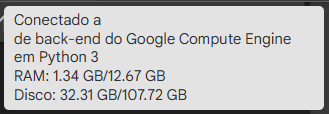

#<font color=lightblue>Referência Bibliográfica

*	CORMEM, T. H., LEISERSON C. E., RIVEST R. L., STEIN C., Algoritmos Teoria e Prática – Gen LTC, 3ª Edição, 2012, ISBN-13: ‎ 978-8535236996

*	ZIVIANI, N., Projetos de Algoritmos com Implementação e Java e C++, Cengage Learning, 2006

*	FEOFILOFF, P. Minicurso de Análise de Algoritmos, 2010, http://www.ime.usp.br/~pf/livrinho-AA/

*	GOODRICH M. T., TAMASSIA R., GOLDWASSER M. H., Data Structures and Algorithms in Python, 2013

*	DIJKSTRA, E. W., A Note on Two Problems in Connexion with Graphs, Numerische Mathematik 1, 269-271 (1959), https://ir.cwi.nl/pub/9256/9256D.pdf

*	OLIVEIRA, V. A., RANGEL, S., ARAUJO, S. A., Teoria dos Grafos, Departamento de Matemática Aplicada, Capitulo 10 (Notas de Aulas), UNESP 2013, https://www.ibilce.unesp.br/Home/Departamentos/MatematicaAplicada/docentes/socorro/caminhominimo.pdf

* BOSE, S., (GitHub), https://github.com/snigdhab7/ShortestPath

*	https://dl.acm.org/doi/pdf/10.1145/1787234.1787249

*	https://akiradev.netlify.app/posts/algoritmo-dijkstra/

*	https://www.freecodecamp.org/portuguese/news/algoritmo-de-caminho-de-custo-minimo-de-dijkstra-uma-introducao-detalhada-e-visual/

* https://horizontes.sbc.org.br/index.php/2017/10/807/

*	https://www.ime.usp.br/~pf/algoritmos_para_grafos/aulas/dijkstra.html

* http://www.dsc.ufcg.edu.br/~pet/jornal/fevereiro2012/materias/historia_da_computacao.html

*	https://www.cs.utexas.edu/~EWD/welcome.html

*	https://en.wikipedia.org/wiki/Edsger_W._Dijkstra

*	https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm

*	https://pt.slideshare.net/slideshow/anlise-de-algoritmos-problemas-em-grafos-caminho-mnimo-algoritmo-de-bellmanford/34528524

*	https://www.ime.usp.br/~pf/algoritmos_para_grafos/aulas/bellman-ford.html

*	https://pt.wikipedia.org/wiki/Algoritmo_de_Bellman-Ford

*	https://en.wikipedia.org/wiki/Lester_R._Ford

*	https://en.wikipedia.org/wiki/Richard_E._Bellman

*	https://www.bcc.unifal-mg.edu.br/~humberto/disciplinas/2010_2_grafos/pdf_aulas/aula_12.pdf




